In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')




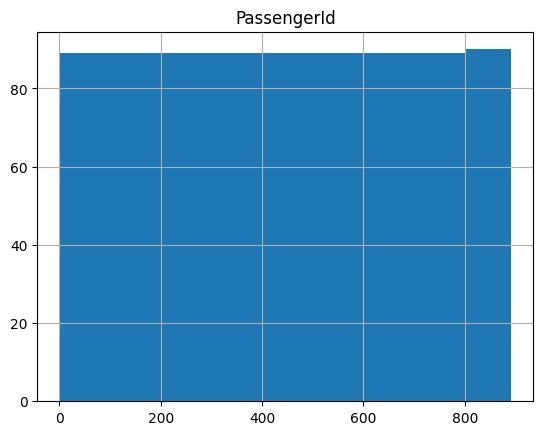

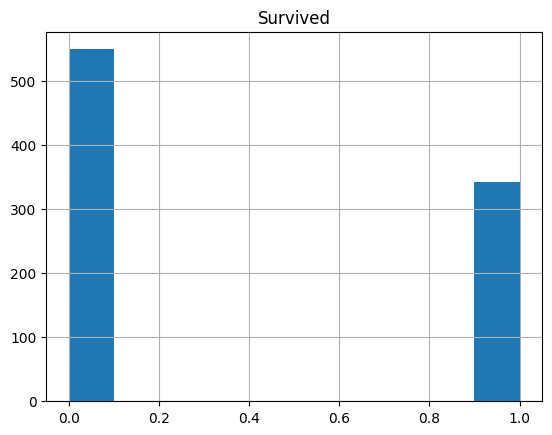

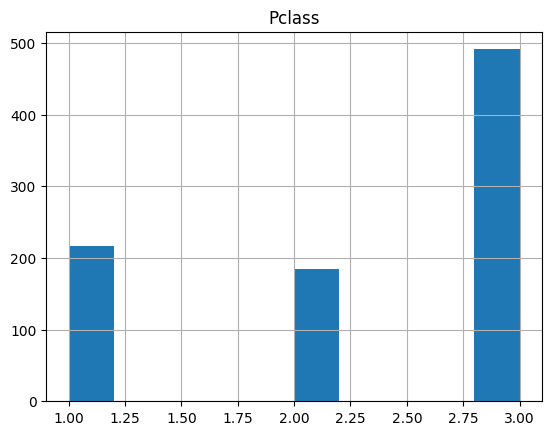

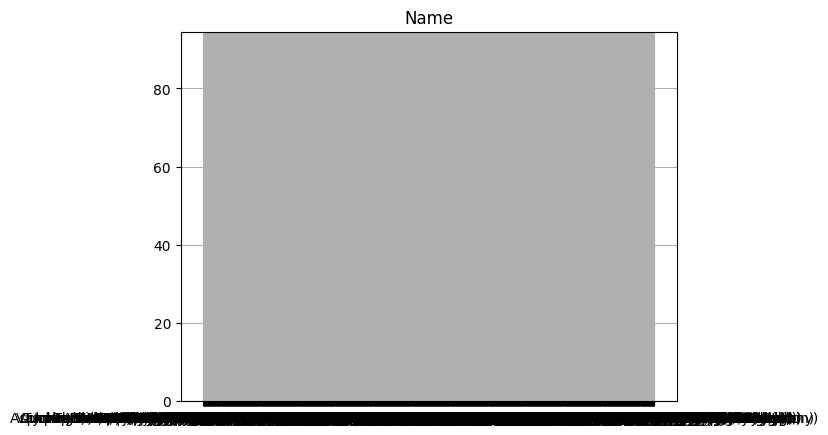

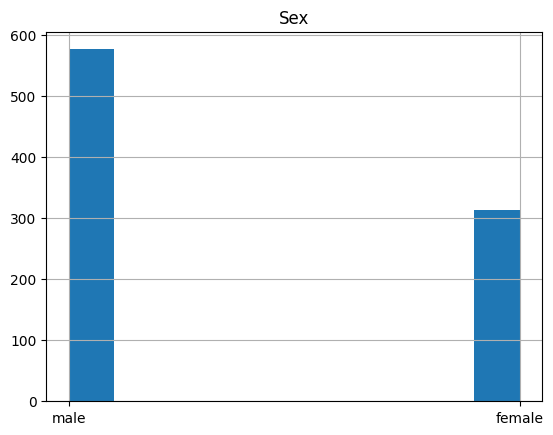

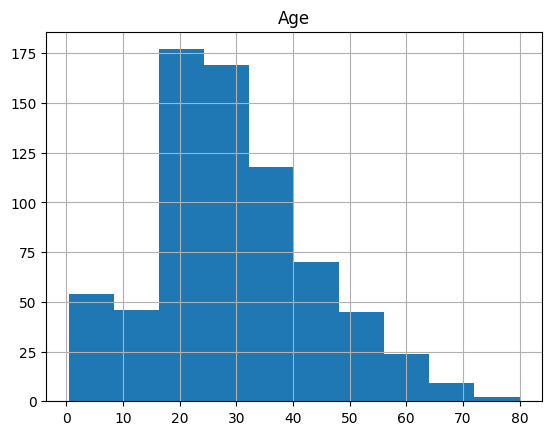

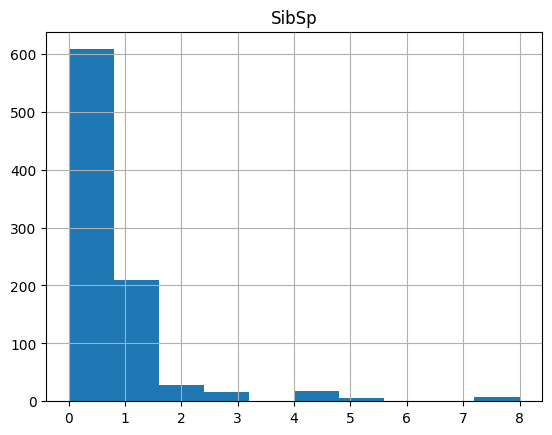

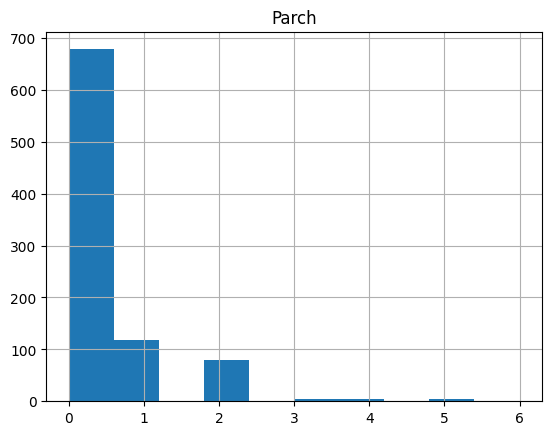

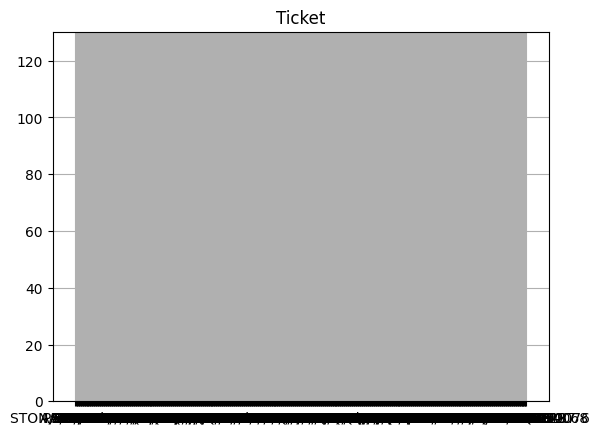

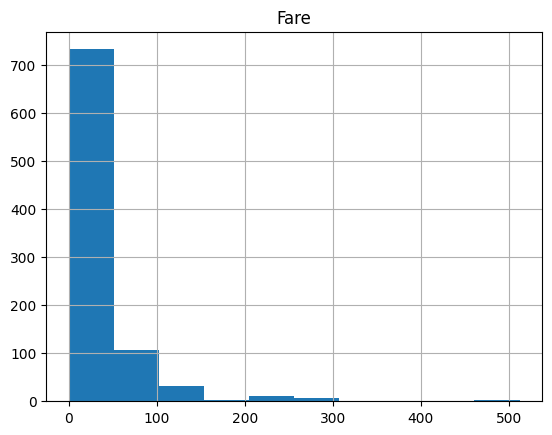

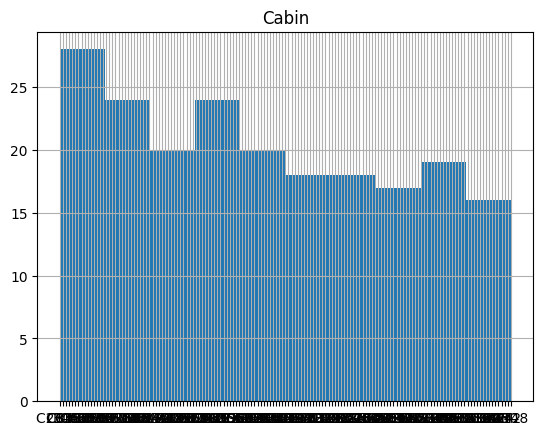

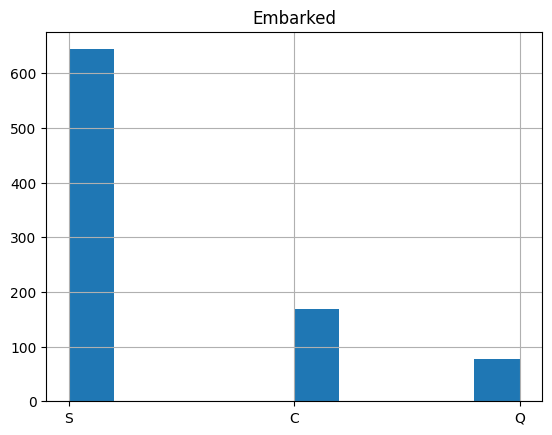

In [6]:
for col in train_data.columns:
    plt.figure()
    train_data[col].hist()
    plt.title(col)
    plt.show()

c:\Users\Pavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


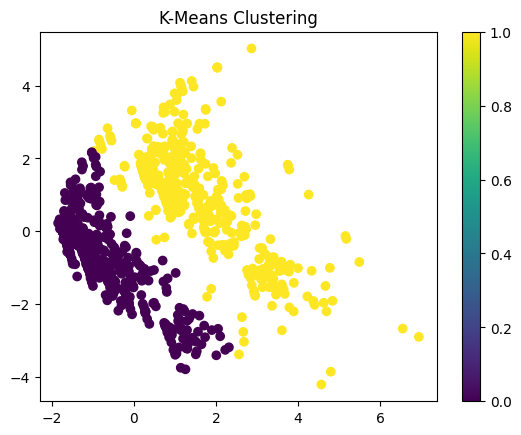

c:\Users\Pavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


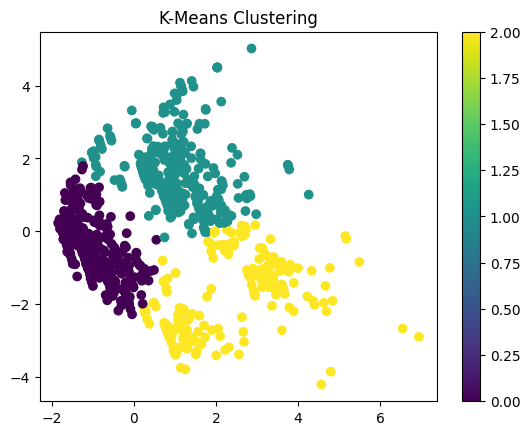

c:\Users\Pavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


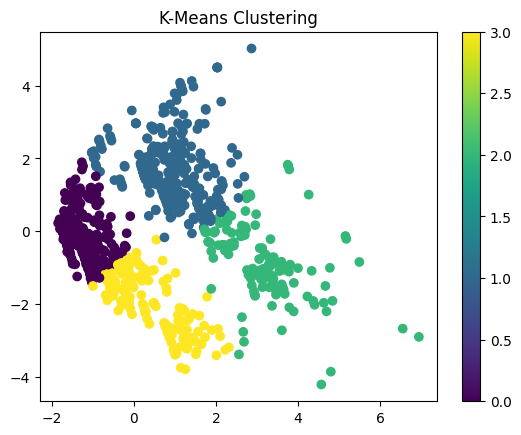

c:\Users\Pavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


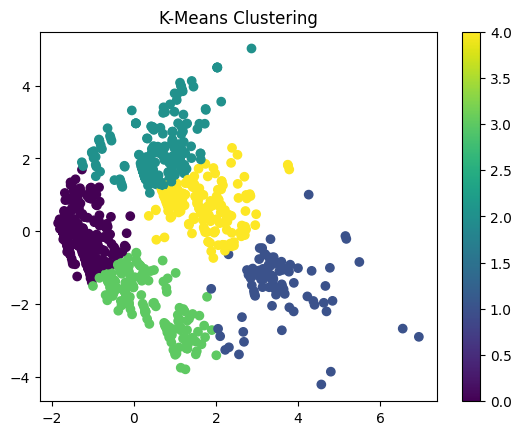

In [7]:
from sklearn.metrics import silhouette_score
data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Заповнення відсутніх значень "Age" та "Fare"
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Заповнення відсутніх значень "Embarked"
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Кодування категоріальних змінних "Sex" та "Embarked"
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# Вибір ознак для кластеризації
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Отримання вибраних ознак для кластеризації
features = data[selected_features]

# Нормалізація даних
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Вибір кількості компонент для зведення розмірності
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

# Список кількостей кластерів для перебору
n_clusters_list = [2, 3, 4, 5]

# Цикл для кожної кількості кластерів
for n_clusters in n_clusters_list:
    # Виконання кластеризації
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_features)

    # Візуалізація результатів
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(reduced_features, cluster_labels)
    
    # Визначення кольорів для кластерів
    colors = ['red', 'blue', 'green']

    # Візуалізація результатів
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('K-Means Clustering')
    plt.colorbar()
    plt.show()

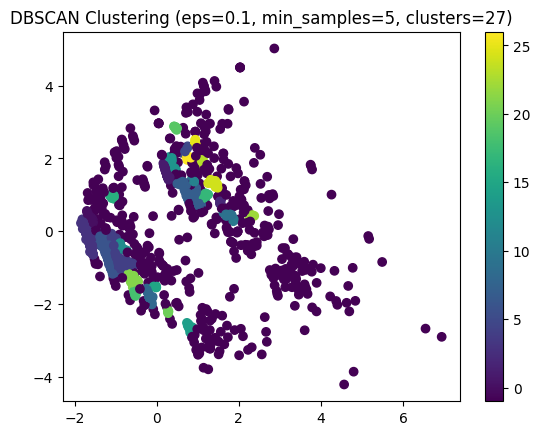

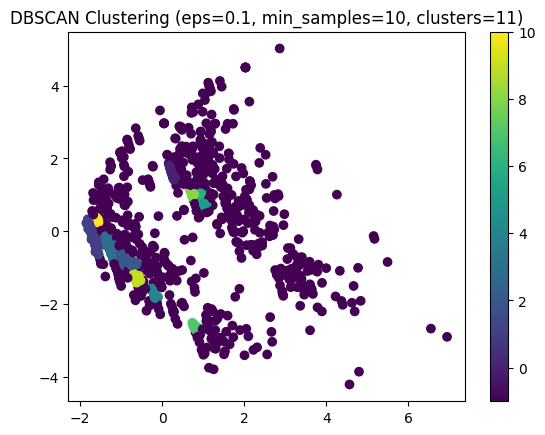

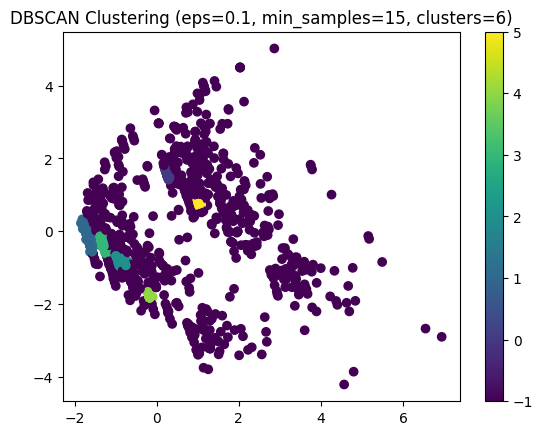

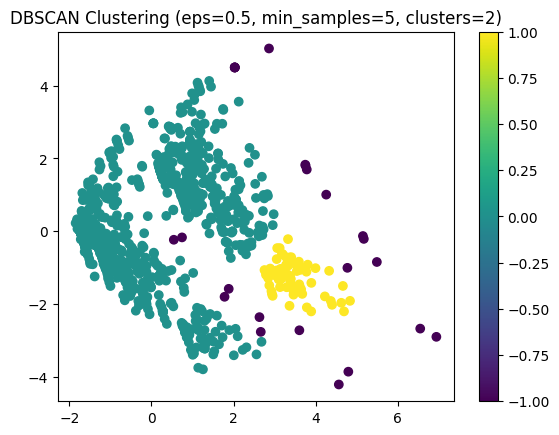

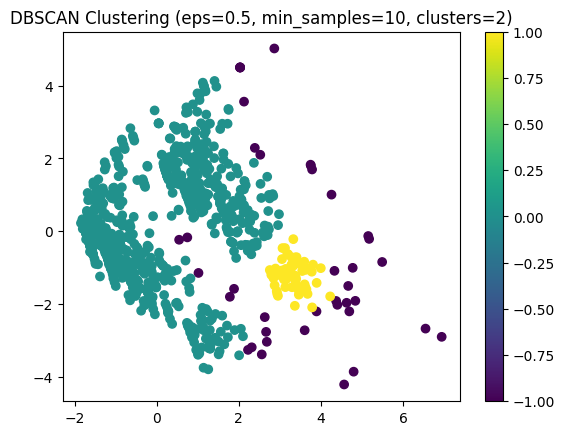

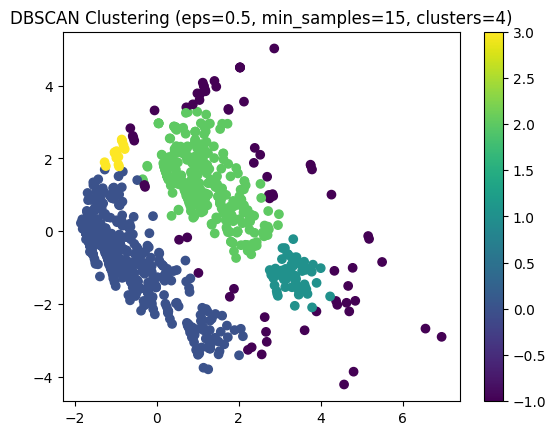

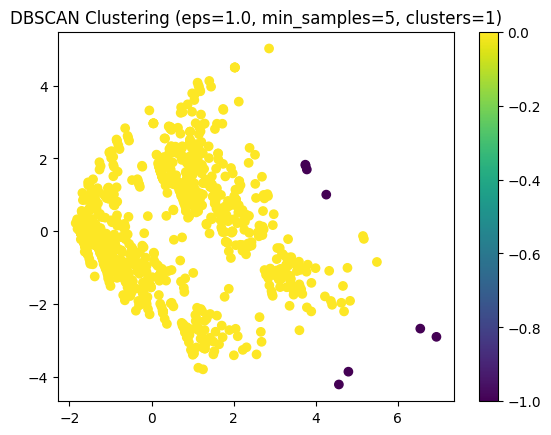

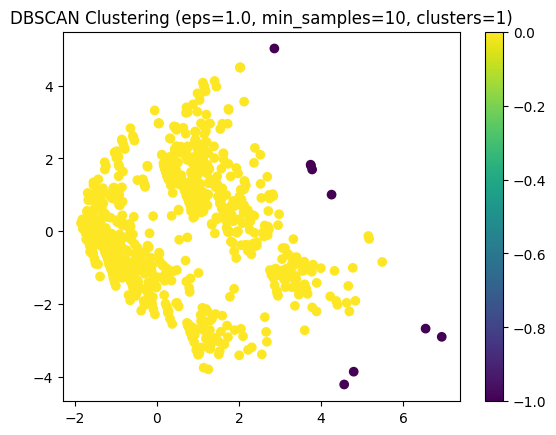

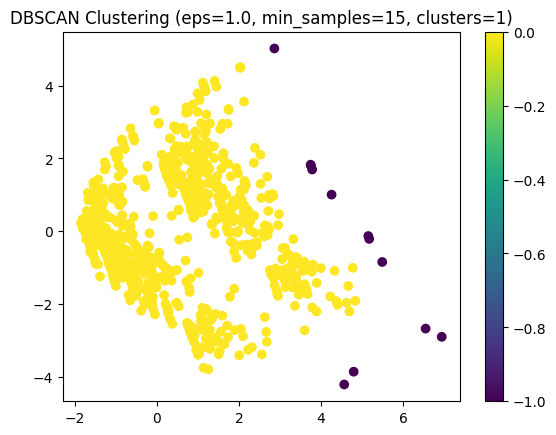

In [8]:
from sklearn.cluster import DBSCAN

# Список параметрів для перебору
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

# Перебір параметрів
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(reduced_features)
        
        # Візуалізація результатів
        unique_labels = np.unique(cluster_labels)
        n_clusters = len(unique_labels) - 1  # Кількість кластерів, крім шумового кластера (-1)
        
        plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples}, clusters={n_clusters})')
        plt.colorbar()
        plt.show()

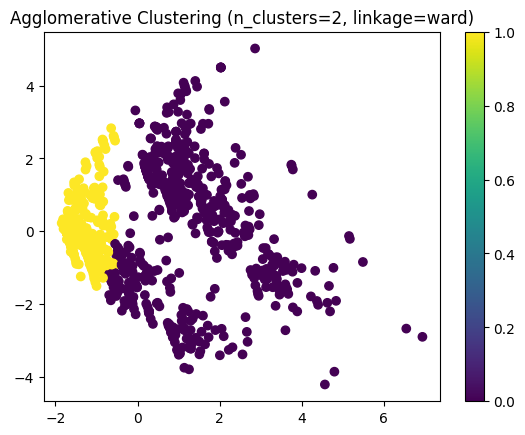

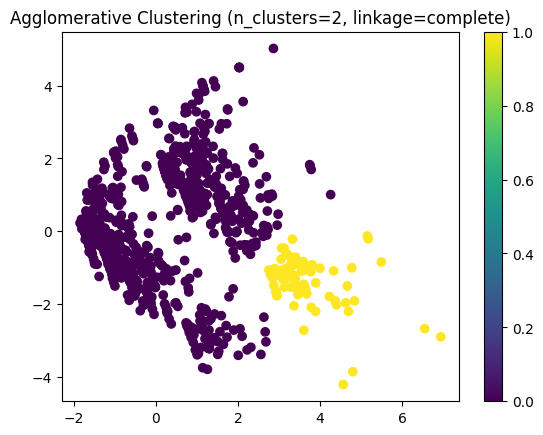

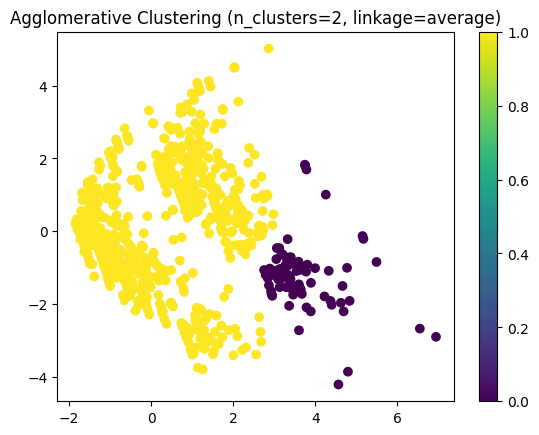

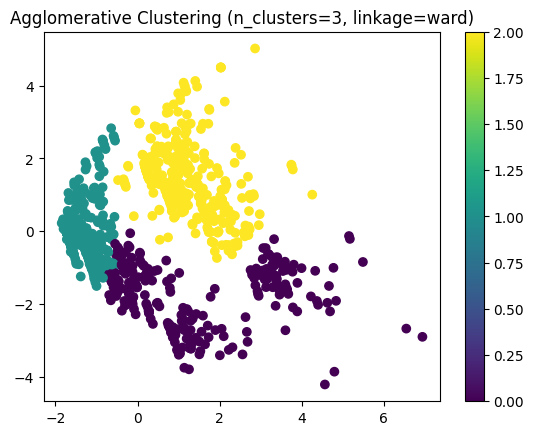

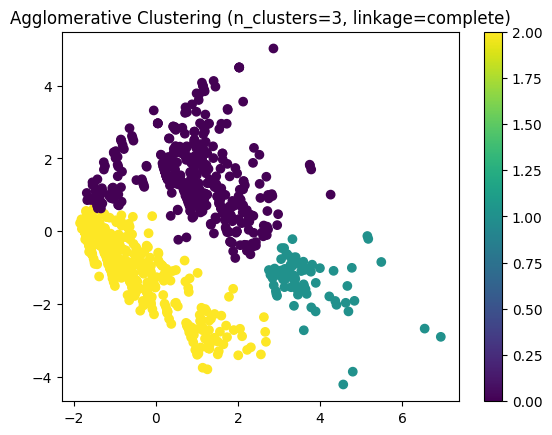

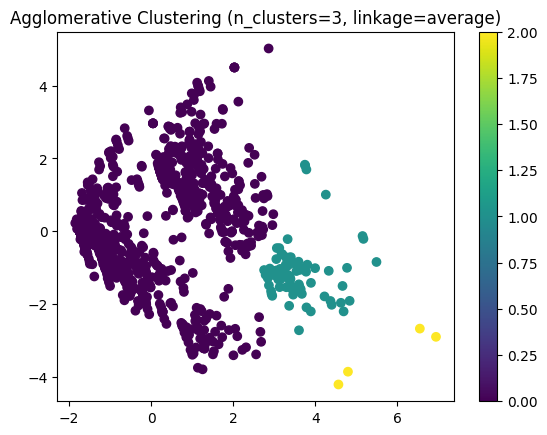

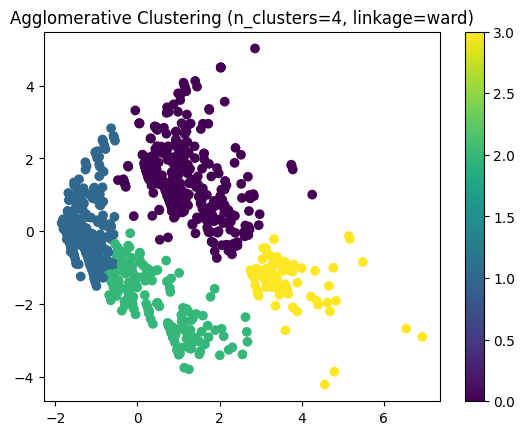

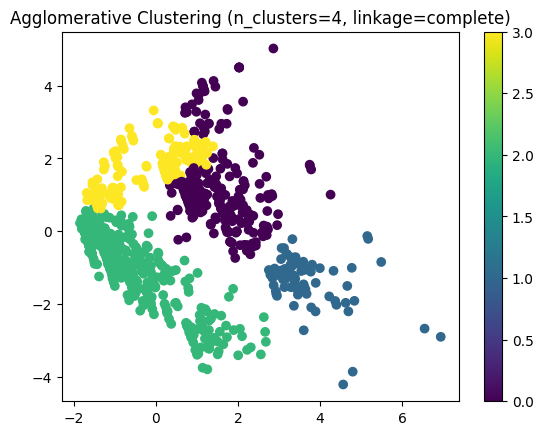

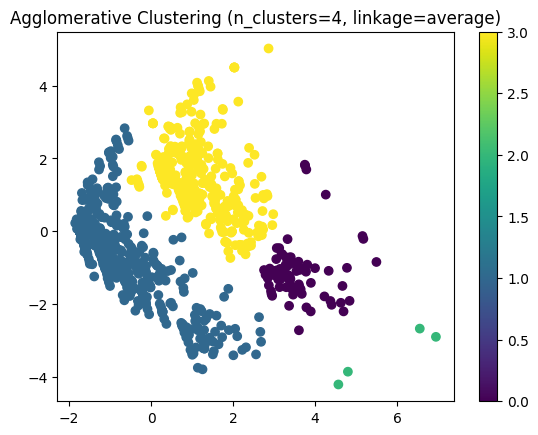

In [9]:
from sklearn.cluster import AgglomerativeClustering

# Список параметрів для перебору
n_clusters_values = [2, 3, 4]
linkage_values = ['ward', 'complete', 'average']

# Перебір параметрів
for n_clusters in n_clusters_values:
    for linkage in linkage_values:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        cluster_labels = clustering.fit_predict(reduced_features)
        
        # Візуалізація результатів
        unique_labels = np.unique(cluster_labels)
        n_clusters = len(unique_labels)
        
        plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
        plt.title(f'Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})')
        plt.colorbar()
        plt.show()
